<a href="https://colab.research.google.com/github/Chromis07/dataStudy/blob/main/ML/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5(supervised_learning)_%EB%B6%84%EB%A5%98%EC%99%80_%ED%9A%8C%EA%B7%80(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mglearn

In [ ]:
# 한글 깨짐 방지
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
import mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


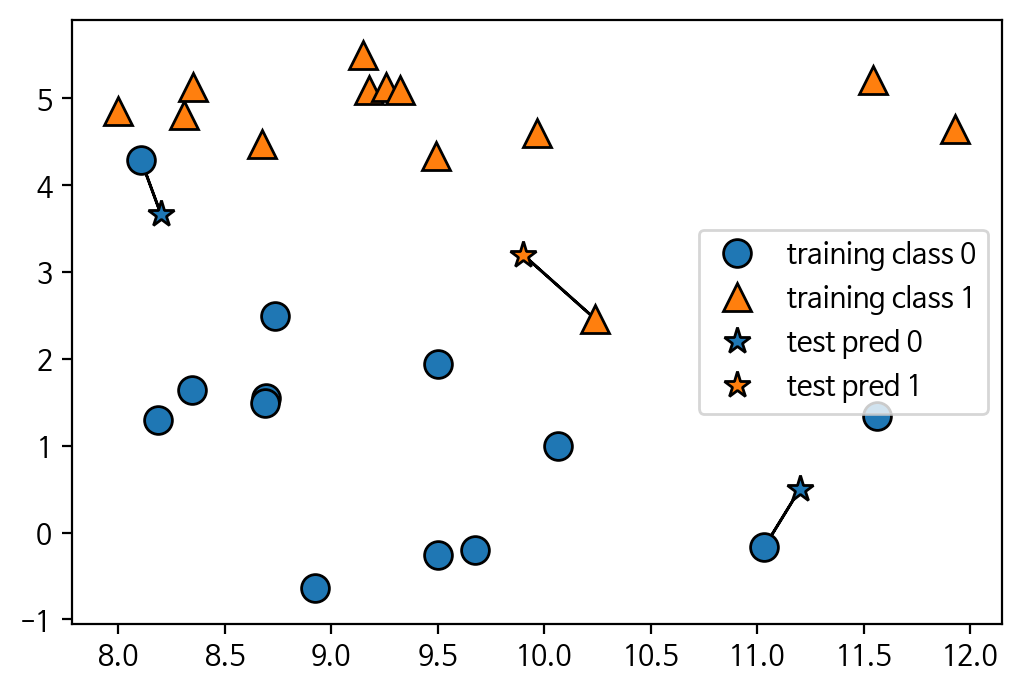

In [ ]:
plt.figure(dpi= 100)
plt.rc('font', family = 'NAnumBarunGothic')

mglearn.plots.plot_knn_classification(n_neighbors=1) # 제일 근접한 1개 이웃 선택

forge data set 분류 예 -> forge data set 에 대한 3-NN 모델의 예측

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


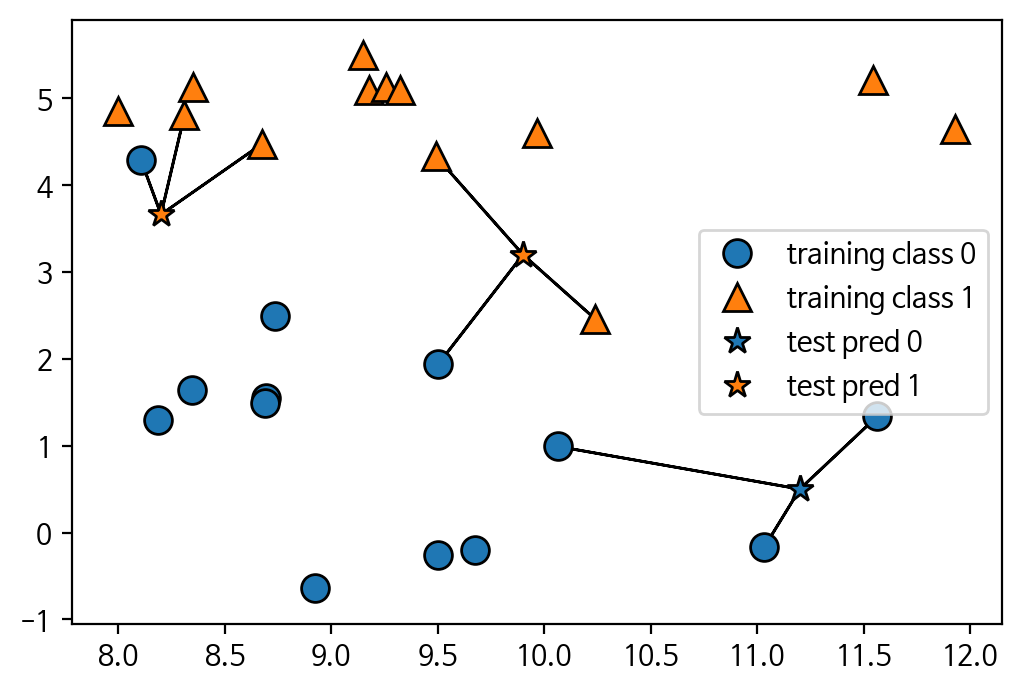

In [ ]:
plt.figure(dpi= 100)
plt.rc('font', family = 'NAnumBarunGothic')

mglearn.plots.plot_knn_classification(n_neighbors=3) # 제일 근접한 3개 이웃 선택

분류 문제 정의 : forge data set을 사용한 이진 분류 (Label, 1) 예측하기 <br>
kNN 알고리즘 적용하여 예측하고 평가하기

데이터 준비하기

In [ ]:
X, y = mglearn.datasets.make_forge() # X : 데이터(feature), y : 레이블(label, 정답)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


일반화 성능을 평가할 수 있도록 데이터 분리(교차 검증) -> train set, test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

KNeighborsClassifier를 import하고 객체 생성

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3) # 이웃의 수 3개 지정

train set를 사용하여 분류 모델 학습

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

test data에 대해 predict 메서드를 호출하여 예측

test set의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산 -> 다음 가장 많은 클래스를 찾기 -> 예측

In [ ]:
clf.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1])

모델이 얼마나 잘 일반화 되었는지 평가 -> 정확도

score() 함수 사용 -> test 데이터와 test 레이블을 넣어 호출

In [ ]:
clf.score(X_test, y_test)

0.8571428571428571

In [ ]:
clf.score(X_train, y_train)

0.9473684210526315

kNN 알고리즘 구현 - 분류

- 클래스 0과 클래스 1로 지정된 영역으로 나뉘는 결정경계(decision boundary) 확인 가능
- 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있음
- 이웃의 수를 늘릴 수록 결정경계는 더 부드러워짐
- 부드러운 경계는 더 단순한 모델을 의미

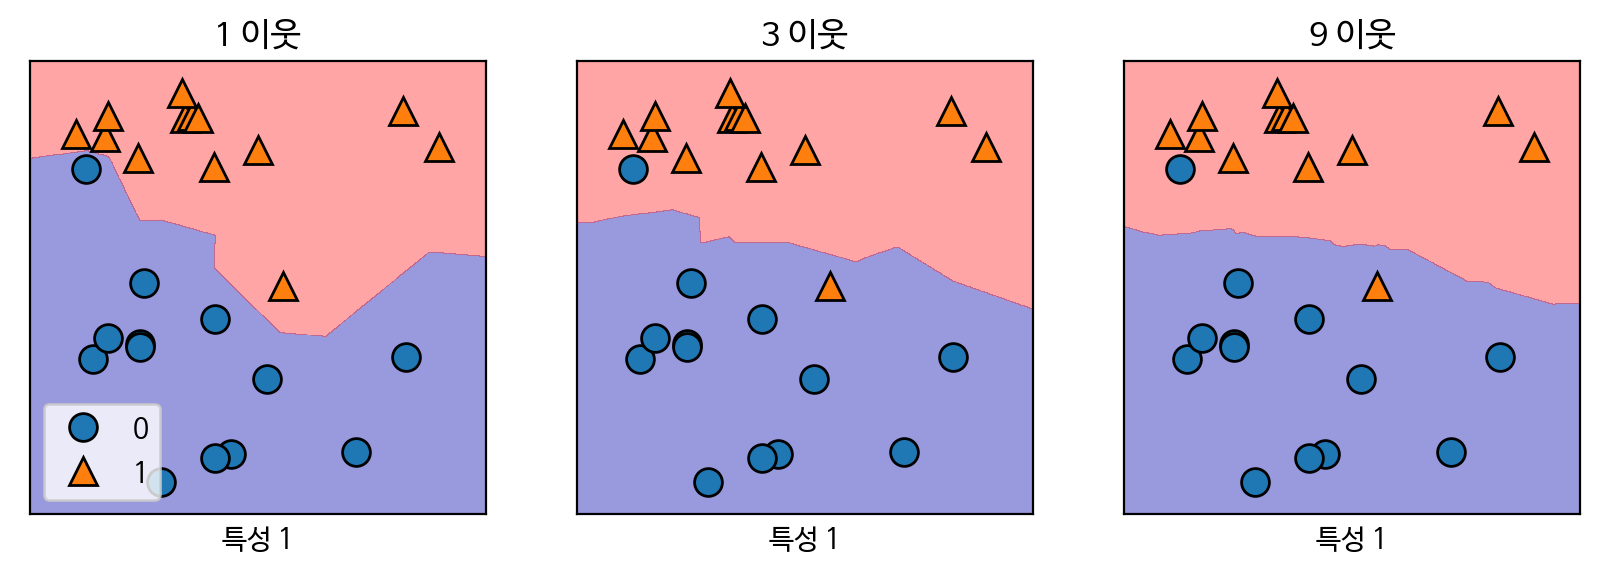

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10,3), dpi = 100)

for n_neighbors, ax in zip([1, 3, 9], axes) : 
  # 이웃을 1,3,9 일때의 결정 경계(decision boundary)
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  
  # 2차원 데이터셋 분할 평면 그리기 mglearn.plot_2d_separator(model 객체, train 데이터, 평면 칠하기, 투명도)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) # 결정 경계 그리기
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax) #2차원 산점도 data set 그리기 위해

  ax.set_title(f'{n_neighbors} 이웃')
  ax.set_xlabel('특성 0') 
  ax.set_xlabel('특성 1')

axes[0].legend(loc=3)
plt.show() 

이웃의 수(결정경계)에 따른 성능 평가

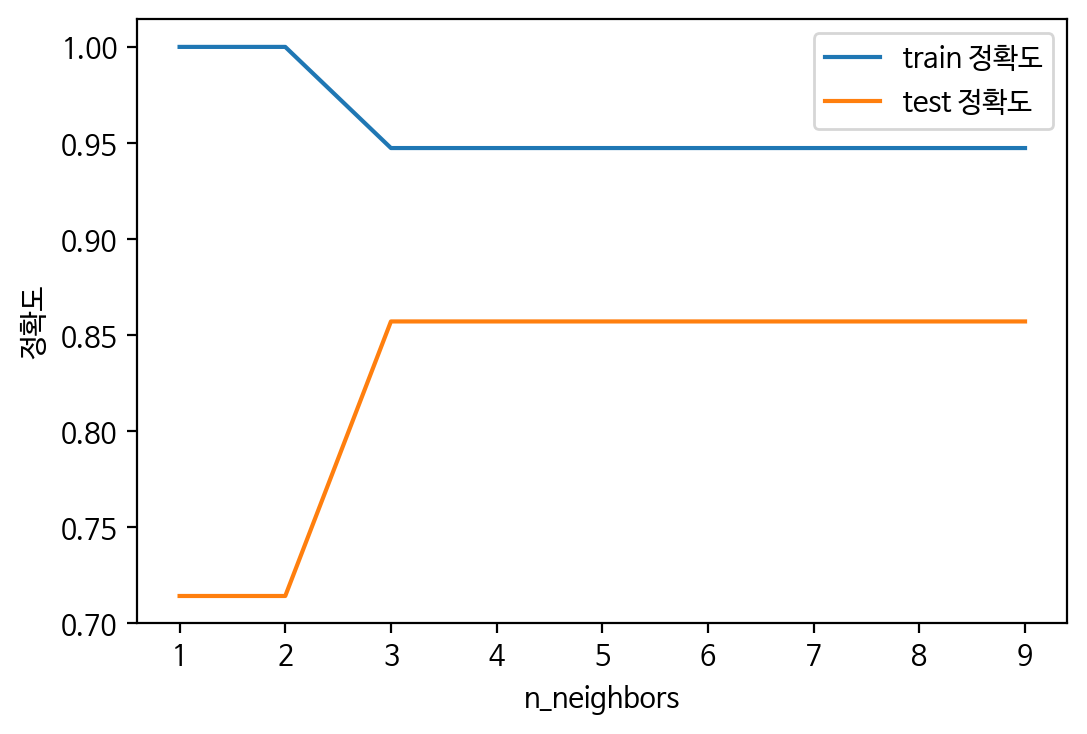

In [ ]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_setting = range(1,10)

for n_neighbors in neighbors_setting :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  # train set 정확도 저장
  train_accuracy.append(clf.score(X_train, y_train))

  # teset set 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# train vs test 정확도 시각화
plt.figure(dpi= 100)
plt.rc('font', family = 'NAnumBarunGothic')

plt.plot(neighbors_setting, train_accuracy, label='train 정확도')
plt.plot(neighbors_setting, test_accuracy, label='test 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

# n_neighbors=3 이 가장 적합

유방암 data set을 사용하여 이웃의 수(결정경계)에 따른 성능평가

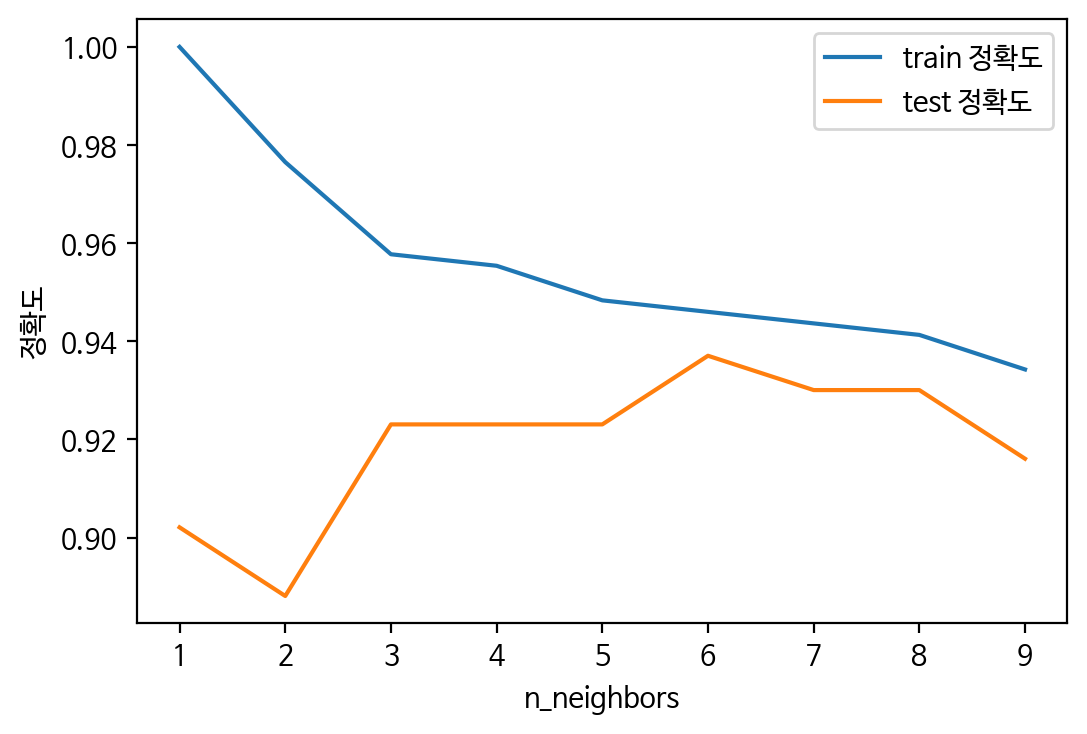

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
  cancer.target, stratify=cancer.target, random_state=66)

# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_setting = range(1,10)

for n_neighbors in neighbors_setting :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  # train set 정확도 저장
  train_accuracy.append(clf.score(X_train, y_train))

  # teset set 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# train vs test 정확도 시각화
plt.figure(dpi= 100)
plt.rc('font', family = 'NAnumBarunGothic')

plt.plot(neighbors_setting, train_accuracy, label='train 정확도')
plt.plot(neighbors_setting, test_accuracy, label='test 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

# 수차례의 cross validation을 통해 최적점 구한다

성능평가 - ROC curve

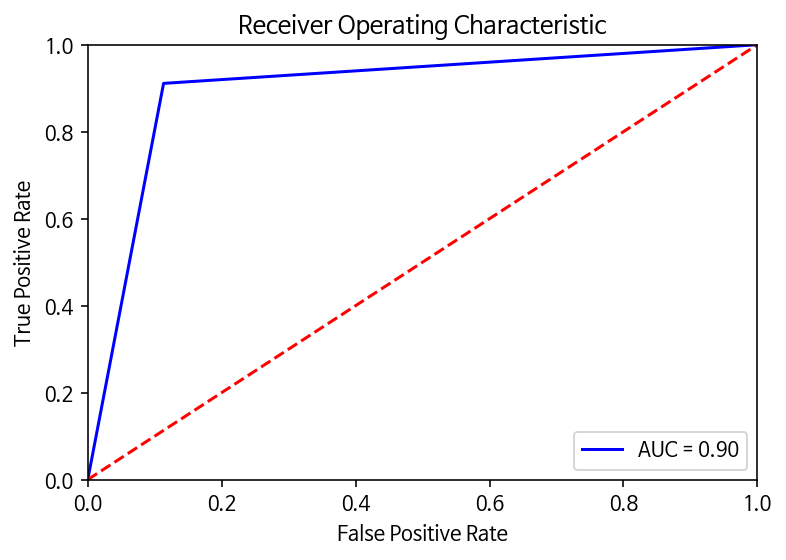

In [ ]:
# Library for Analysing the ML model
from sklearn import metrics

# 모델 생성
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I : plt

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# test data를 가지고 y_hat을 예측 (분류)
y_hat = clf.predict(X_test)

# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        53
           1       0.93      0.91      0.92        90

    accuracy                           0.90       143
   macro avg       0.89      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



In [ ]:
# sklearn을 이용하면 전부 계산해준다
print('accuracy', metrics.accuracy_score(y_test,y_hat))
print('precision', metrics.precision_score(y_test,y_hat))
print('recall', metrics.recall_score(y_test,y_hat))
print('f1', metrics.f1_score(y_test,y_hat))

accuracy 0.9020979020979021
precision 0.9318181818181818
recall 0.9111111111111111
f1 0.9213483146067416


k-Neighbors Regression
* k=1 경우 그냥 가장 가까운 이웃의 타켓값
* k >=2 경우 회귀분석 -> 여러 개의 최근접 이웃 간의 평균(average or mean)이 예측 값

wave 데이터셋을 사용하여 이웃의 수(결정경계)에 따라 성능평가

데이터 셋 분리하기 (train, test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 train set 과 test set으로 나눔 (default - test size =0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

KNeighborsRegressor를 import하고 객체 생성

In [ ]:
# 이웃의 수는 3으로 하여 모델 객체를 생성
reg = KNeighborsRegressor(n_neighbors=3)

train set를 사용하여 회귀 모형 학습

In [ ]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

성능평가 하기

In [ ]:
reg.score(X_test, y_test)

0.8344172446249604

In [ ]:
# score() 함수 : r-sqaure 결정계수 0~1 사이 값을 갖고, 관계가 높을 수록 1에 가까운 값을 갖음
# 0에 가까울 수록 데이터 분포를 제대로 표현하지 못한 것
print(f'test set R^2 : {reg.score(X_test, y_test):.2f}')

test set R^2 : 0.83


KNeighborsRegressor 분석

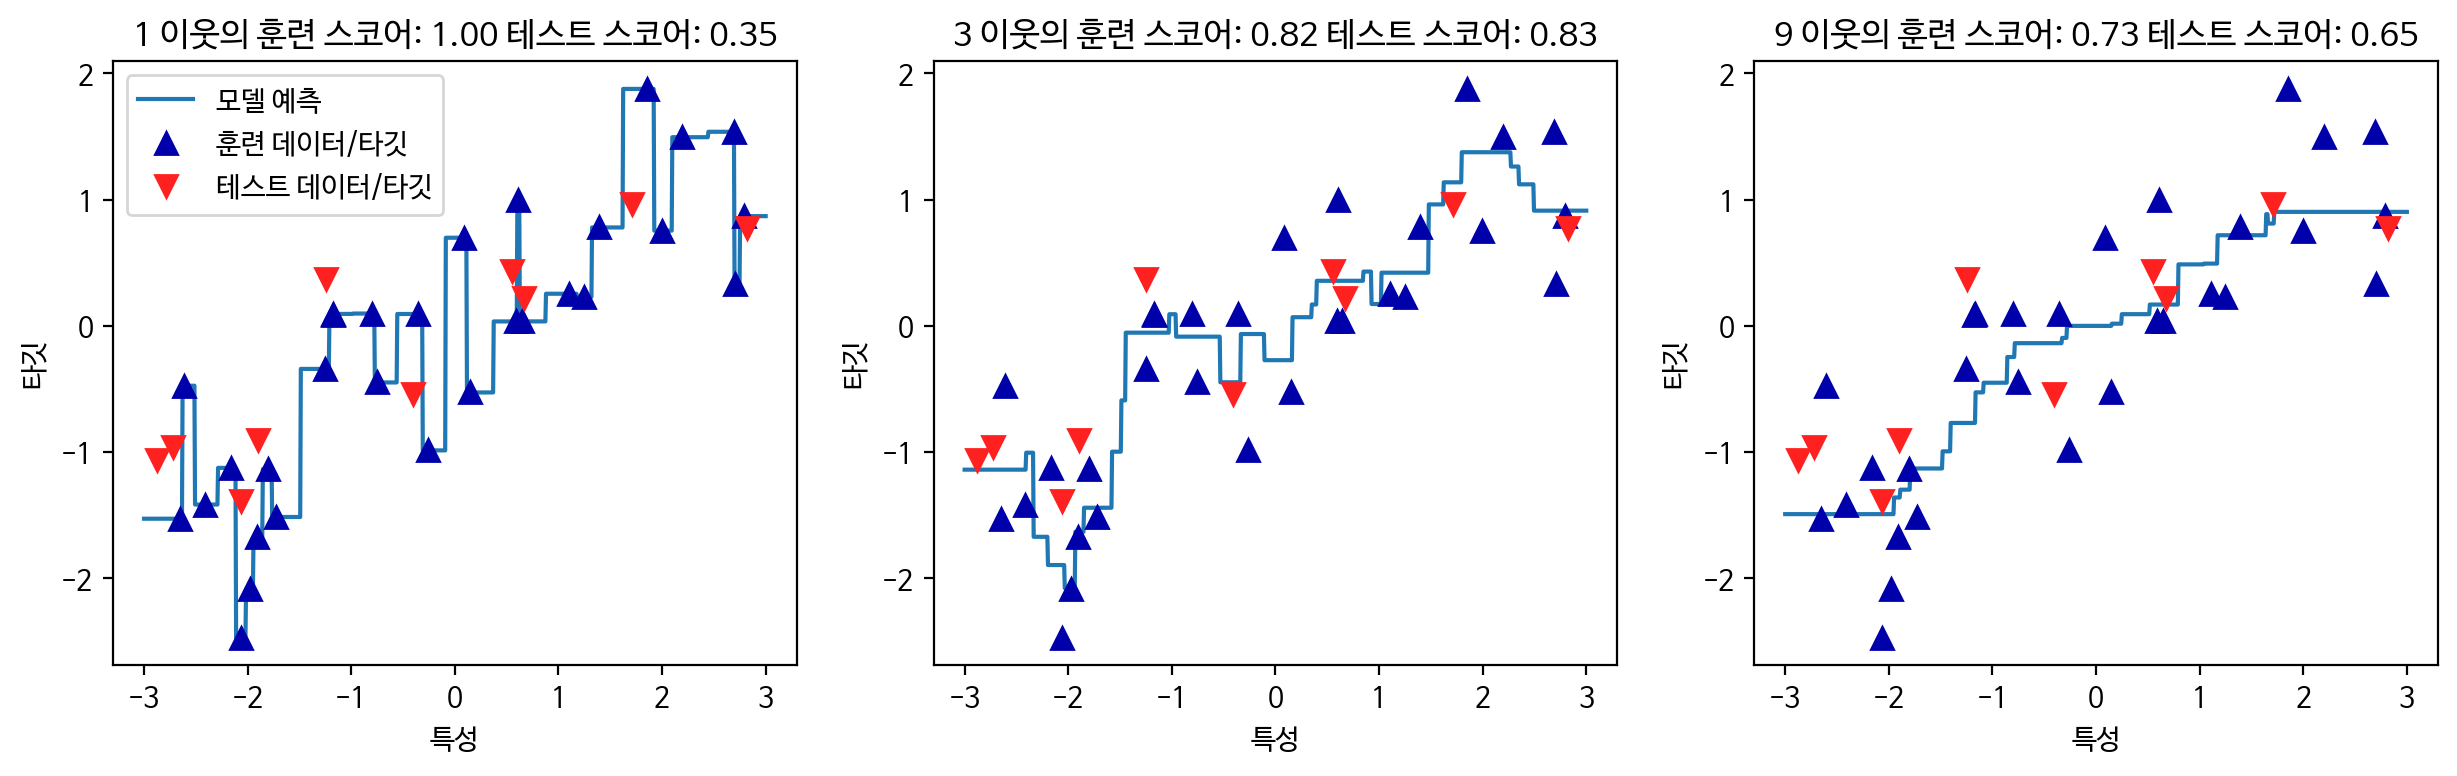

In [ ]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4),dpi = 100)
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()

# 추세선이 만들어짐!

선형 모델 : 선형 함수를 만들어 예측 수행

선형 회귀 모델

w[0]: 0.393906  b: -0.031804


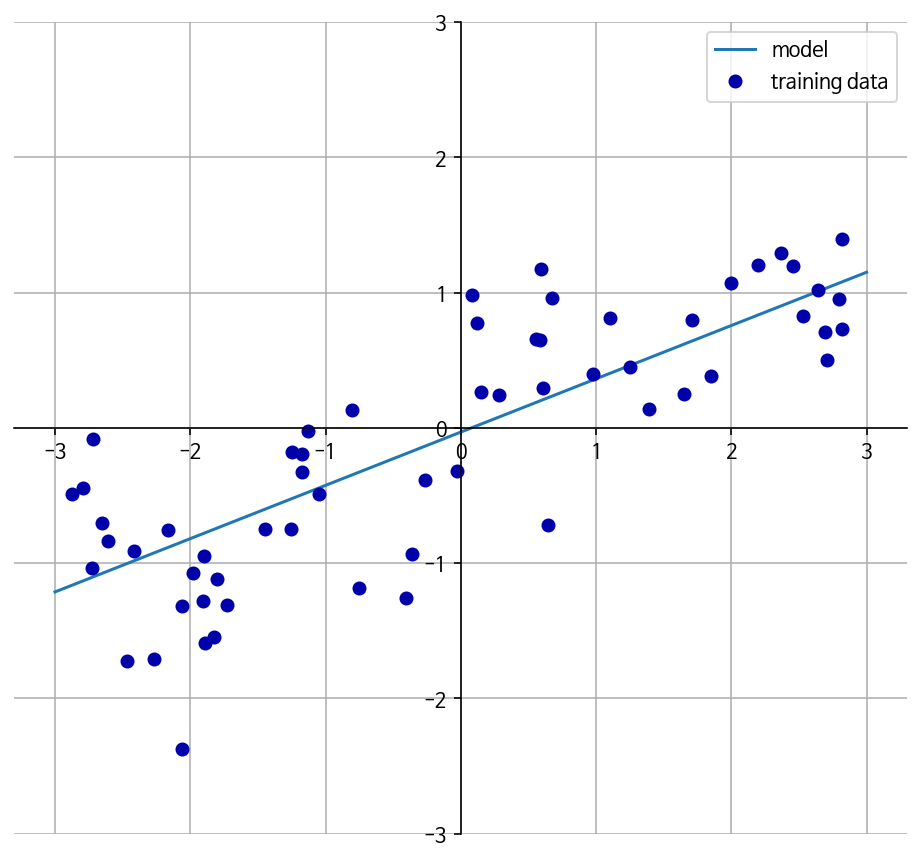

In [ ]:
mglearn.plots.plot_linear_regression_wave()

선형 회귀(최소제곱법)

데이터 준비하기

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

선형모델 만든 후 학습시키기

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

lr 객체 확인하기

In [ ]:
print("lr.coef_ :", lr.coef_) # w 가중치, 기울기
print("lr.intercept_ :", lr.intercept_) # 절편

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


성능 평가

In [ ]:
print("train set 점수 :", lr.score(X_train, y_train))
print("test set 점수 :", lr.score(X_test, y_test))
# train-test set 점수가 비슷하고 낮다면, 과소적합 (underfitting)

train set 점수 : 0.6700890315075756
test set 점수 : 0.65933685968637


보스턴 주택가격 데이터셋을 사용한 선형 회귀 성능 평가

data set 분리하기

In [ ]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

train set으로 학습하기

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

성능 평가하기

In [ ]:
print("train set 점수 :", lr.score(X_train, y_train))
print("test set 점수 :", lr.score(X_test, y_test)) # 과대적합 overfitting된 상태

train set 점수 : 0.9520519609032727
test set 점수 : 0.607472195966557


릿지 회귀 -> Regularization을 통해서 overfitting이 되지 않게 하기 위한 선형 모델

보스턴 주택가격 dataset을 사용한 릿지 회귀 성능 평가

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # 규제 속성(alpha) = 1.0

성능 평가

In [ ]:
print("train set 점수 :", ridge.score(X_train, y_train))
print("test set 점수 :", ridge.score(X_test, y_test))
# 폭주하지 않고 정상적으로 선형적인 모델

train set 점수 : 0.8857966585170941
test set 점수 : 0.7527683481744751


alpha 매개변수를 통해 모델 설정 가능

In [ ]:
# alpha=10 값만 조정하여 성능 평가
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("train set 점수 :", ridge10.score(X_train, y_train))
print("test set 점수 :", ridge10.score(X_test, y_test))

train set 점수 : 0.7882787115369614
test set 점수 : 0.6359411489177309


In [ ]:
# alpha=0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("train set 점수 :", ridge01.score(X_train, y_train))
print("test set 점수 :", ridge01.score(X_test, y_test))

train set 점수 : 0.9282273685001992
test set 점수 : 0.7722067936479818


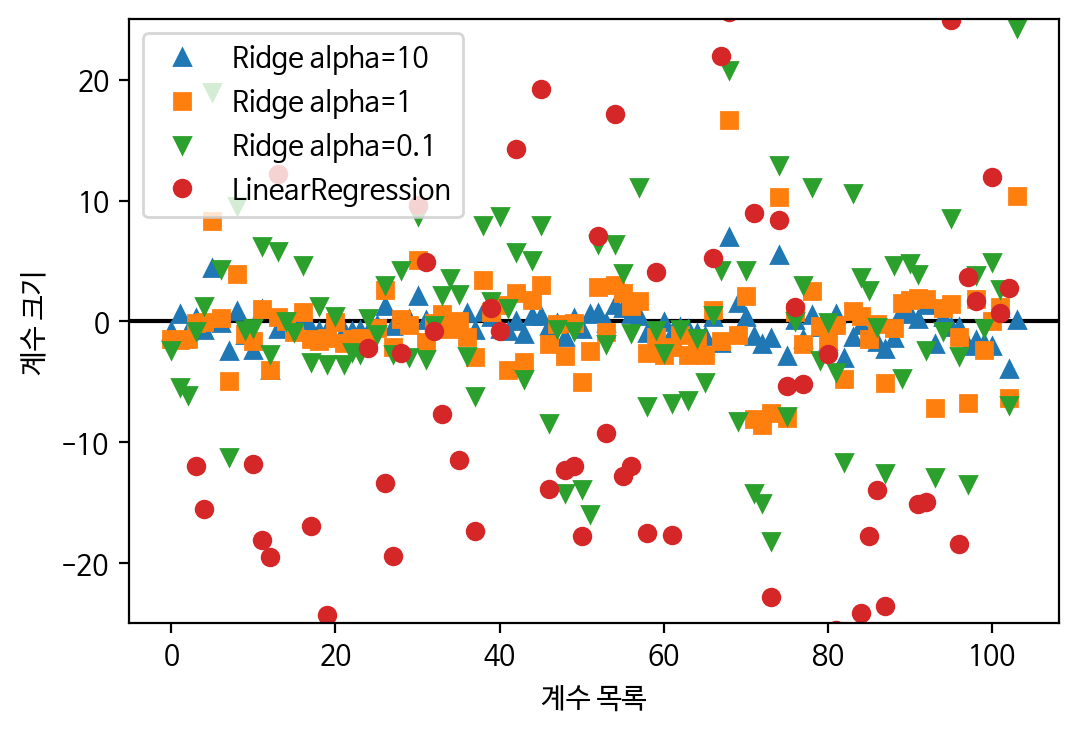

In [ ]:
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi = 100)

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()

Lasso Regression

확장된 보스턴 주택 가격 dataset에 라쏘를 적용

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("train set 점수 :", lasso.score(X_train, y_train))
print("test set 점수 :", lasso.score(X_test, y_test)) # underfitting
print('사용한 특성의 개수 :', np.sum(lasso.coef_ !=0))

train set 점수 : 0.29323768991114607
test set 점수 : 0.20937503255272294
사용한 특성의 개수 : 4


underfitting을 줄이기 위해 alpha 값 설정

In [ ]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print(f"train set 점수 : {lasso001.score(X_train, y_train):.2f}")
print(f"test set 점수 : {lasso001.score(X_test, y_test):.2f}")
print('사용한 특성의 개수 :', np.sum(lasso001.coef_ !=0))

train set 점수 : 0.90
test set 점수 : 0.77
사용한 특성의 개수 : 32


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318007, tolerance: 3.233182126649076
  positive)


선형 분류 모델의 C값 설정에 따른 결정 경계

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


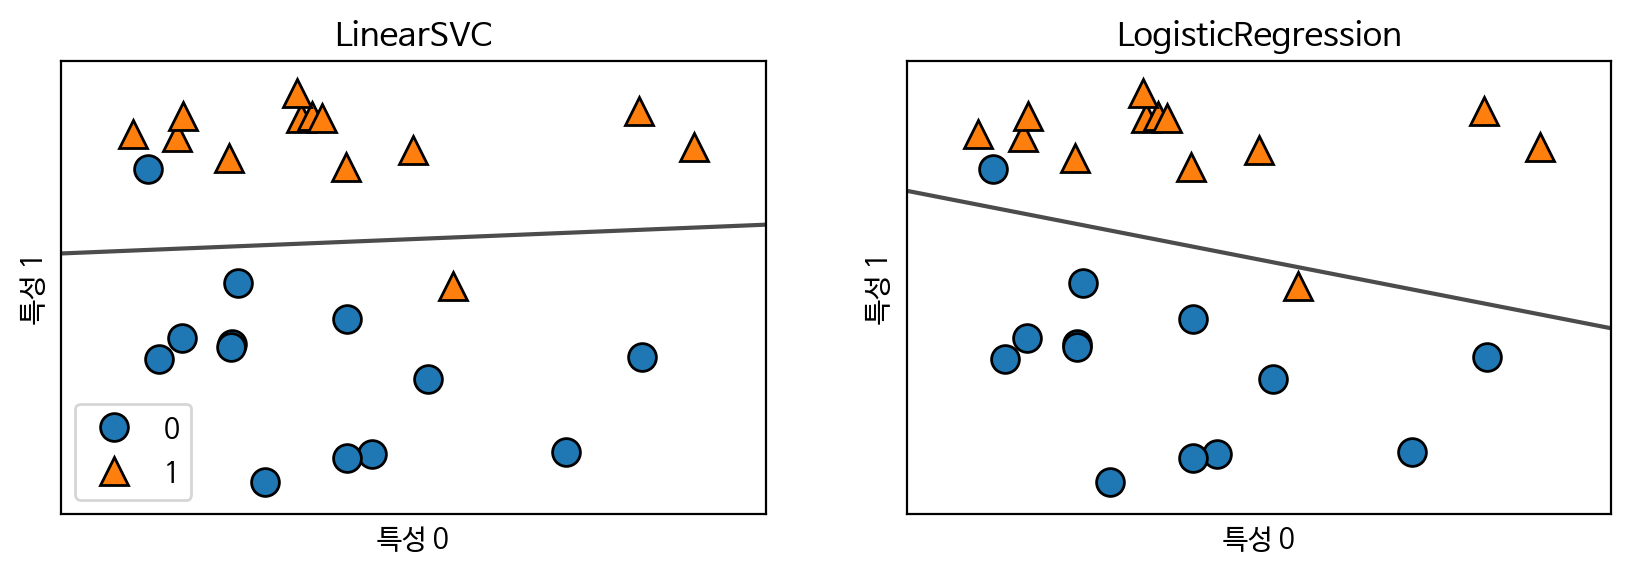

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi']  = 100

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show()

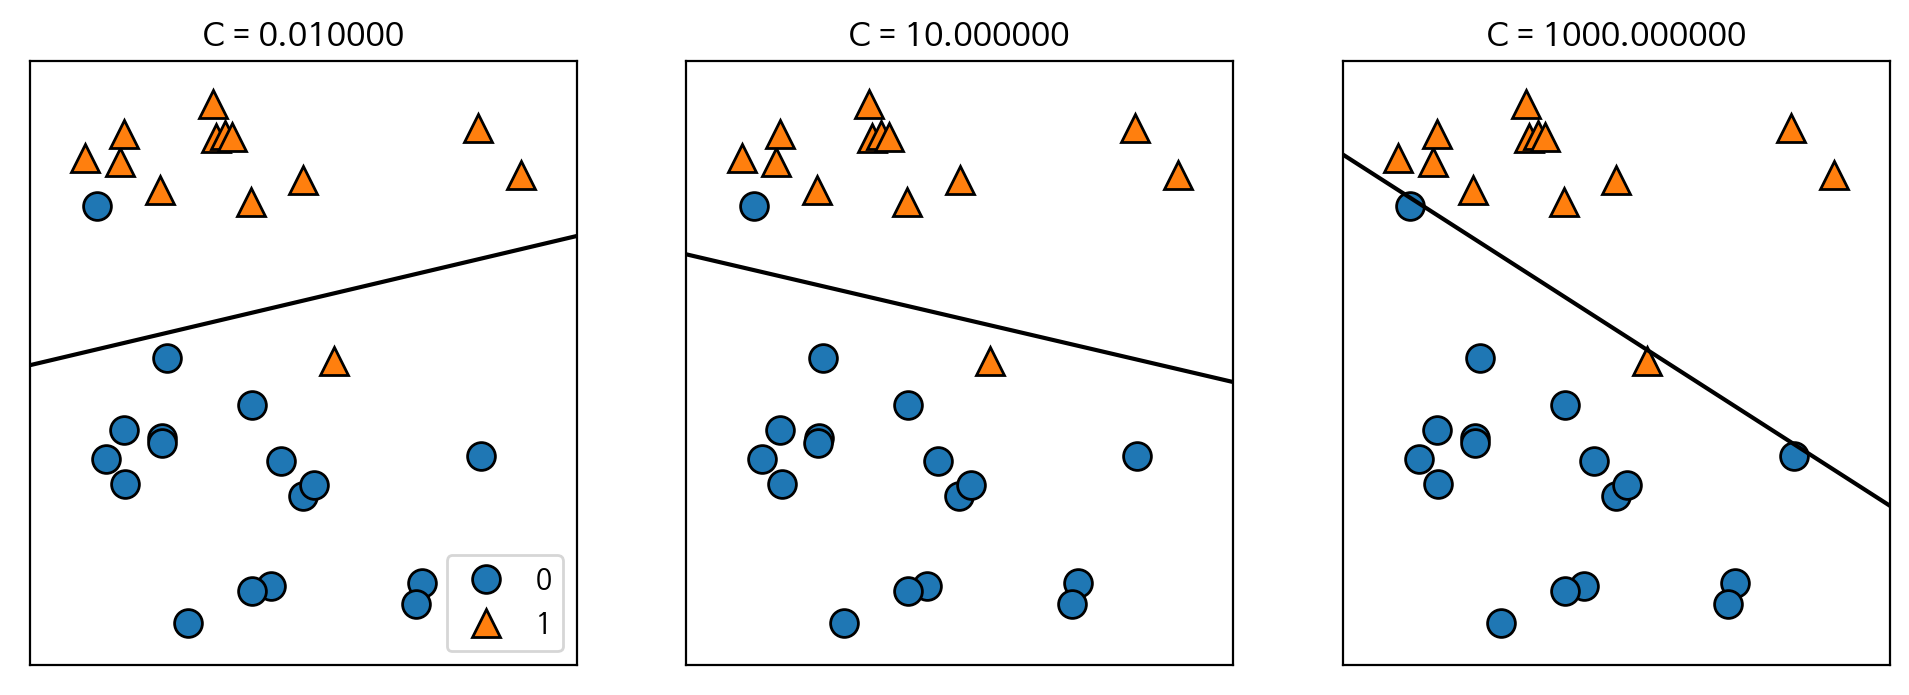

In [ ]:
# C의 값이 낮을 수록 규제 높음
# C의 값이 높을 수록 규제 낮음
mglearn.plots.plot_linear_svc_regularization()

유방암 dataset을 사용한 로지스틱 회귀 LogisticRegression 성능 평가

규제의 강도를 결정하는 매개변수 C값 설정에 따른 유방암 dataset을 사용한 성능 평가 비교

데이터 준비하기

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# wave 데이터셋을 train set 과 test set으로 나눔 (default - test size =0.25)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)

LogisticRegression C=1 (default)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train) # 규제 C=1

print(f"train set 점수 : {logreg.score(X_train, y_train):.3f}")
print(f"test set 점수 : {logreg.score(X_test, y_test):.3f}")

train set 점수 : 0.958
test set 점수 : 0.958


LogisticRegression C=100 (규제 완화) L2 규제


In [ ]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train) # 규제 C=100

print(f"train set 점수 : {logreg100.score(X_train, y_train):.3f}")
print(f"test set 점수 : {logreg100.score(X_test, y_test):.3f}")

train set 점수 : 0.984
test set 점수 : 0.972


LogisticRegression C=100 (규제 완화) L1 규제

In [ ]:
lr_l1 = LogisticRegression(solver='liblinear', C=100, penalty="l1", max_iter=1000).fit(X_train, y_train)

print(f"train set 점수 : {lr_l1.score(X_train, y_train):.3f}")
print(f"test set 점수 : {lr_l1.score(X_test, y_test):.3f}")

train set 점수 : 0.986
test set 점수 : 0.979


LogisticRegression C=0.01 (규제 강화)

In [ ]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train) # 규제 C=100

print(f"train set 점수 : {logreg001.score(X_train, y_train):.3f}")
print(f"test set 점수 : {logreg001.score(X_test, y_test):.3f}")

train set 점수 : 0.953
test set 점수 : 0.951


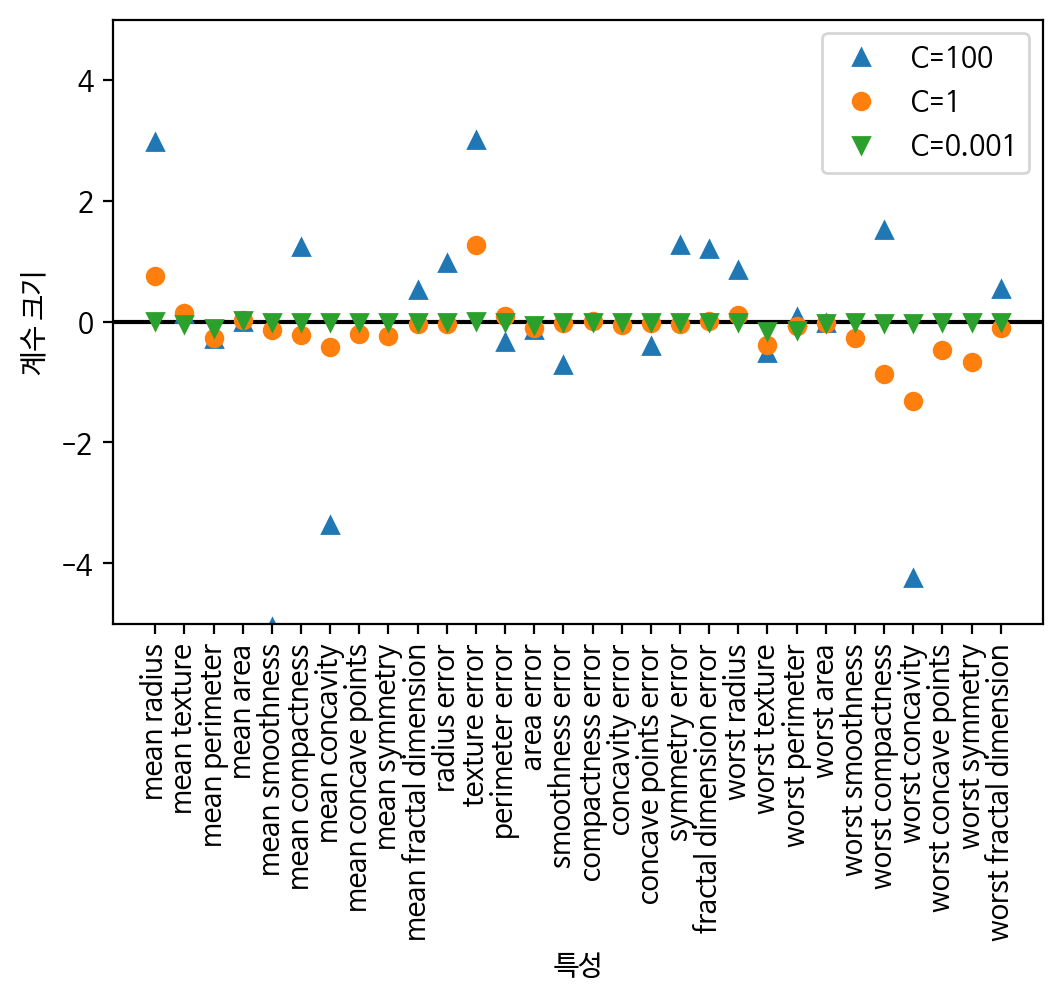

In [ ]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

L1 규제를 통한 특성 확인

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


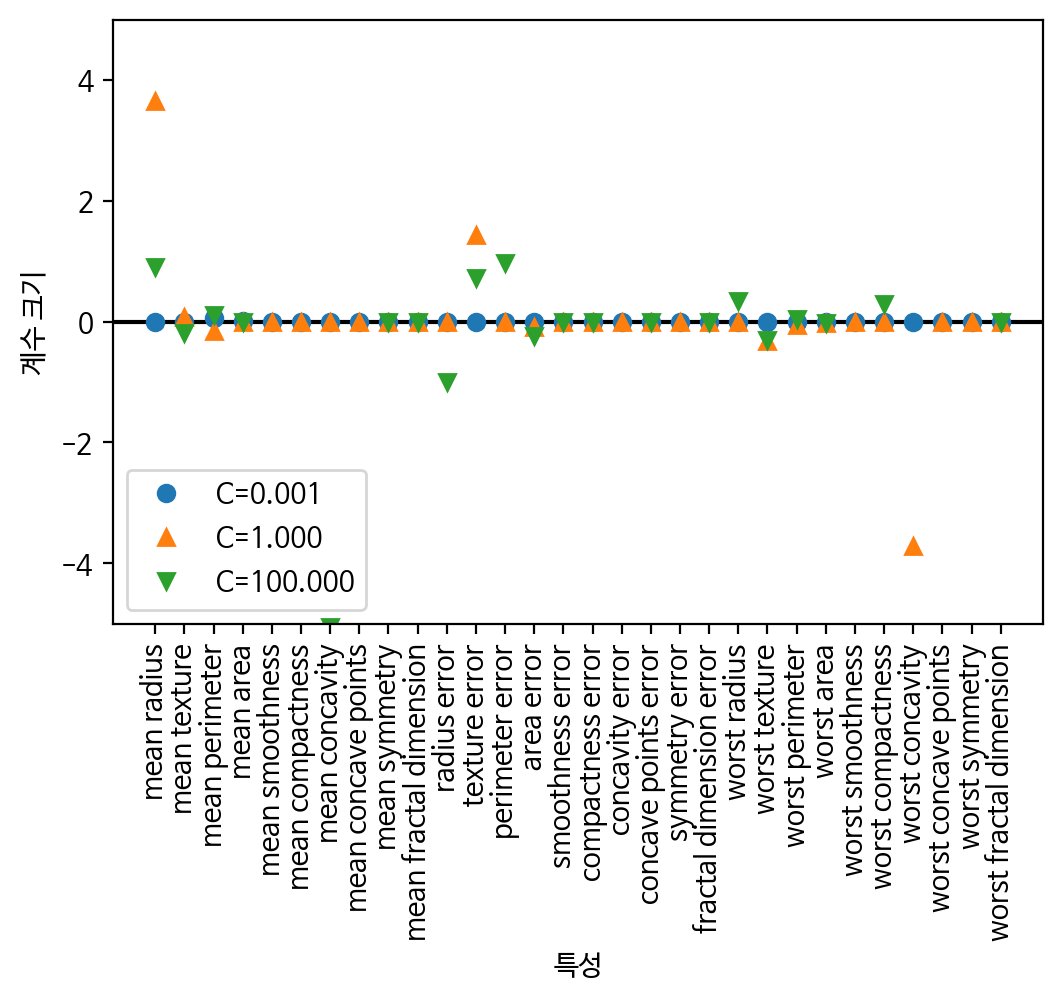

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()